# 線形回帰モデルとニューラルネットワークの比較

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
print("説明変数")
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df_data.shape)
display(df_data.head())

print("目的変数")
display(boston.target[:10])

説明変数
(506, 13)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

目的変数


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.40 -0.06  0.42 -0.22  0.35 -0.38  0.62  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.40 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.62 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.38  0.18  -0.36  0.05 -0.38  0.13 -0.27  0.29 -0.44 -0.44    -0.18   
LSTAT    0.45 -0.41   0.60 -0.05  0.59 -0.61  0.60 -0.50  0.49  0.54     0.37   
MEDV    -0.39  0.36  -0.48  0.18 -0.43  0.70 -0.38  0.25 -0.38 -0.47    -0.51   

            B  LSTAT  MEDV  
CRIM    -0.38   0.45 -0.39  
ZN       0.18  -0.41  0.36  
INDUS   -0.36   0.60 -0.48  
CHAS     0.05  -0.05  0.18  
NOX     -0.38   0.59 -0.43  
RM       0.13  -0.61  0.70  
AGE     -0.27   0.60 -0.38  
DIS      0.29  -0.50  0.25  
RAD     -0.44   0.49 -0.38  
TAX     -0.44   0.54 -0.47  
PTRATIO -0.18   0.37 -0.51  
B        1.00  -0.37  0.33  
LSTAT   -0.37   1.00 -0.74  
MEDV     0.33  -0.74  1.00

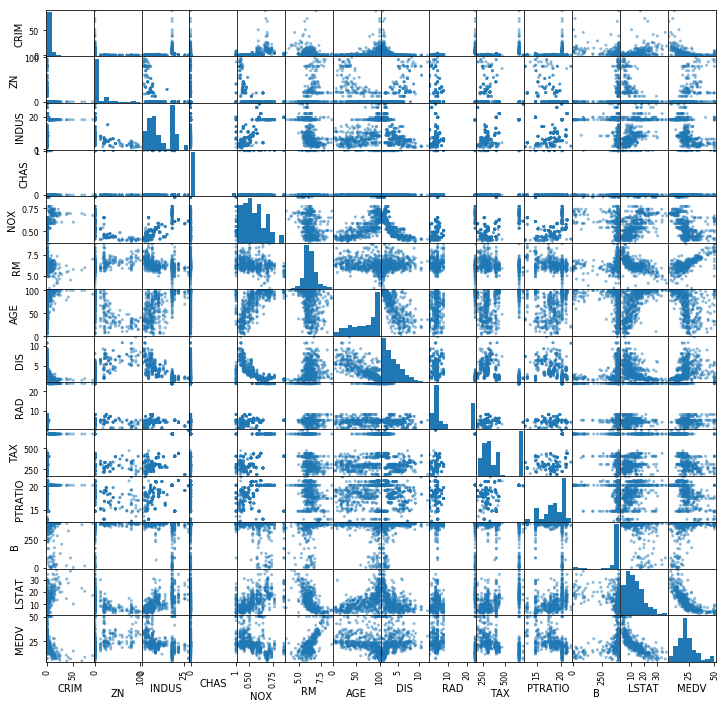

In [4]:
df = pd.concat([df_data, pd.DataFrame(boston.target, columns=["MEDV"])], axis=1)
display(df.corr().round(2))
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

### データセット

In [5]:
X = df_data[["LSTAT"]].as_matrix()
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.3,  random_state=1234)

# 標準化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
std = StandardScaler()
y_train = std.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1)[0]
y_test = std.transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

### 線形回帰でモデリングする

In [6]:
# 学習
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE= 0.4987617444520942
切片= 8.39593395566766e-17 回帰係数= [-0.73177683]


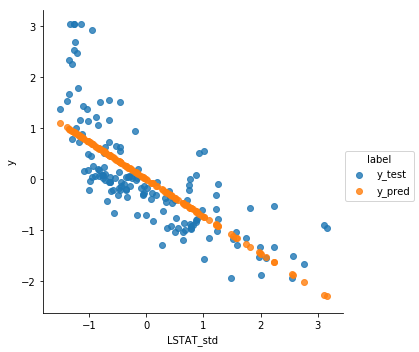

In [7]:
# 予測
y_pred =reg.predict(X_test)
df_result = pd.DataFrame(y_pred, columns=["linearRegression"])
print("MSE=",mean_squared_error(y_test, y_pred))
print("切片=", reg.intercept_, "回帰係数=", reg.coef_)

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()

### ニューラルネットワークでモデリングする

In [8]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

/Users/yamaokadaichi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Train on 354 samples, validate on 152 samples
Epoch 1/200
354/354 [==============================] - 0s 342us/step - loss: 1.2107 - mean_squared_error: 1.2107 - val_loss: 0.8778 - val_mean_squared_error: 0.8778
Epoch 2/200
354/354 [==============================] - 0s 37us/step - loss: 0.6544 - mean_squared_error: 0.6544 - val_loss: 0.6146 - val_mean_squared_error: 0.6146
Epoch 3/200
354/354 [==============================] - 0s 30us/step - loss: 0.5165 - mean_squared_error: 0.5165 - val_loss: 0.5243 - val_mean_squared_error: 0.5243
Epo

Epoch 47/200
354/354 [==============================] - 0s 33us/step - loss: 0.4698 - mean_squared_error: 0.4698 - val_loss: 0.5020 - val_mean_squared_error: 0.5020
Epoch 48/200
354/354 [==============================] - 0s 29us/step - loss: 0.4661 - mean_squared_error: 0.4661 - val_loss: 0.5033 - val_mean_squared_error: 0.5033
Epoch 49/200
354/354 [==============================] - 0s 32us/step - loss: 0.4690 - mean_squared_error: 0.4690 - val_loss: 0.5024 - val_mean_squared_error: 0.5024
Epoch 50/200
354/354 [==============================] - 0s 25us/step - loss: 0.4662 - mean_squared_error: 0.4662 - val_loss: 0.5005 - val_mean_squared_error: 0.5005
Epoch 51/200
354/354 [==============================] - 0s 28us/step - loss: 0.4663 - mean_squared_error: 0.4663 - val_loss: 0.5055 - val_mean_squared_error: 0.5055
Epoch 52/200
354/354 [==============================] - 0s 25us/step - loss: 0.4697 - mean_squared_error: 0.4697 - val_loss: 0.5010 - val_mean_squared_error: 0.5010
Epoch 53/2

Epoch 97/200
354/354 [==============================] - 0s 29us/step - loss: 0.4671 - mean_squared_error: 0.4671 - val_loss: 0.5461 - val_mean_squared_error: 0.5461
Epoch 98/200
354/354 [==============================] - 0s 31us/step - loss: 0.4862 - mean_squared_error: 0.4862 - val_loss: 0.5186 - val_mean_squared_error: 0.5186
Epoch 99/200
354/354 [==============================] - 0s 28us/step - loss: 0.4736 - mean_squared_error: 0.4736 - val_loss: 0.5070 - val_mean_squared_error: 0.5070
Epoch 100/200
354/354 [==============================] - 0s 31us/step - loss: 0.4693 - mean_squared_error: 0.4693 - val_loss: 0.5090 - val_mean_squared_error: 0.5090
Epoch 101/200
354/354 [==============================] - 0s 25us/step - loss: 0.4686 - mean_squared_error: 0.4686 - val_loss: 0.5041 - val_mean_squared_error: 0.5041
Epoch 102/200
354/354 [==============================] - 0s 27us/step - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 0.5089 - val_mean_squared_error: 0.5089
Epoch 1

354/354 [==============================] - 0s 26us/step - loss: 0.4655 - mean_squared_error: 0.4655 - val_loss: 0.5017 - val_mean_squared_error: 0.5017
Epoch 147/200
354/354 [==============================] - 0s 28us/step - loss: 0.4669 - mean_squared_error: 0.4669 - val_loss: 0.5024 - val_mean_squared_error: 0.5024
Epoch 148/200
354/354 [==============================] - 0s 29us/step - loss: 0.4733 - mean_squared_error: 0.4733 - val_loss: 0.5126 - val_mean_squared_error: 0.5126
Epoch 149/200
354/354 [==============================] - 0s 27us/step - loss: 0.4810 - mean_squared_error: 0.4810 - val_loss: 0.5010 - val_mean_squared_error: 0.5010
Epoch 150/200
354/354 [==============================] - 0s 27us/step - loss: 0.4730 - mean_squared_error: 0.4730 - val_loss: 0.4978 - val_mean_squared_error: 0.4978
Epoch 151/200
354/354 [==============================] - 0s 25us/step - loss: 0.4679 - mean_squared_error: 0.4679 - val_loss: 0.4983 - val_mean_squared_error: 0.4983
Epoch 152/200
354/

354/354 [==============================] - 0s 28us/step - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 0.4976 - val_mean_squared_error: 0.4976
Epoch 196/200
354/354 [==============================] - 0s 32us/step - loss: 0.4667 - mean_squared_error: 0.4667 - val_loss: 0.5001 - val_mean_squared_error: 0.5001
Epoch 197/200
354/354 [==============================] - 0s 30us/step - loss: 0.4667 - mean_squared_error: 0.4667 - val_loss: 0.4990 - val_mean_squared_error: 0.4990
Epoch 198/200
354/354 [==============================] - 0s 35us/step - loss: 0.4680 - mean_squared_error: 0.4680 - val_loss: 0.4994 - val_mean_squared_error: 0.4994
Epoch 199/200
354/354 [==============================] - 0s 29us/step - loss: 0.4653 - mean_squared_error: 0.4653 - val_loss: 0.5010 - val_mean_squared_error: 0.5010
Epoch 200/200
354/354 [==============================] - 0s 37us/step - loss: 0.4669 - mean_squared_error: 0.4669 - val_loss: 0.5022 - val_mean_squared_error: 0.5022


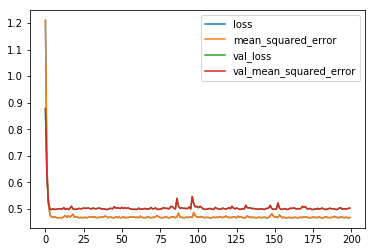

In [9]:
batch_size = 32
epochs = 200

# ネットワークの設定
model = Sequential()
model.add(Dense(10, activation='linear', input_shape=(1,)))
# model.add(Dense(5, activation='linear'))
model.add(Dense(1, activation='linear')) #この活性化関数は変更してはならない
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=SGD(),
              metrics=['mse'])

# 計算
history = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数
                    verbose=1,         # ログ出力
                    validation_data=(X_test, y_test))

# 計算過程の描画
pd.DataFrame(history.history).plot()
plt.show()


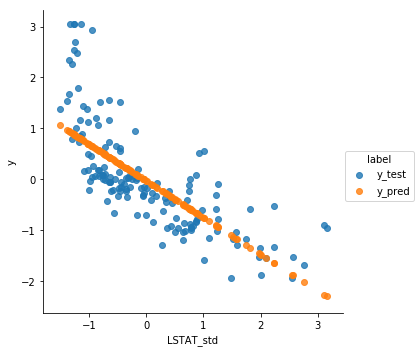

In [10]:
# 予測
y_pred = model.predict(X_test)
df_result["NN"] = y_pred

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()


### [演習]
* 中間層の数を2層(ノード数は10と5)に変更してみましょう
* 中間層の活性化関数をsigmoidに変更してみましょう